## Pandas Sales Analysis

#### Objective

- What is the overall sales trend? 
- Which are the Top 10 products by sales?
- Which are the Most Selling Products?
- Which is the most preferred Ship Mode?
- Which are the Most Profitable Category and Sub-Category?

#### Importing required libraries

In [58]:
# Data Manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn 

<h4> Importing the datasets

In [9]:
df = pd.read_excel('superstore_sales.xlsx') 

print(df)

              order_id order_date  ship_date       ship_mode  \
0         AG-2011-2040 2011-01-01 2011-01-06  Standard Class   
1        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
2         HU-2011-1220 2011-01-01 2011-01-05    Second Class   
3      IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
4        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
...                ...        ...        ...             ...   
51285   CA-2014-115427 2014-12-31 2015-01-04  Standard Class   
51286     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
51287   MX-2014-110527 2014-12-31 2015-01-02    Second Class   
51288   MX-2014-114783 2014-12-31 2015-01-06  Standard Class   
51289   CA-2014-156720 2014-12-31 2015-01-04  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer   New South Wales      Australia

#### Data audit

In [13]:
# First five rows of the dataset
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [14]:
# Last five rows of the dataset
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [15]:
# Shape of the dataset
df.shape

(51290, 21)

In [16]:
# Columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [17]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [18]:
# Checking missing values
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [19]:
# Generating descriptive statistics summary
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


## EXPLORATORY DATA ANALYSIS

#### WHAT IS THE OVERALL SALES TREND?

In [20]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [22]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [23]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [27]:
# grouping month_year 

df_trend = df.groupby('month_year').sum()['sales'].reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_18508\3833057017.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trend = df.groupby('month_year').sum()['sales'].reset_index()


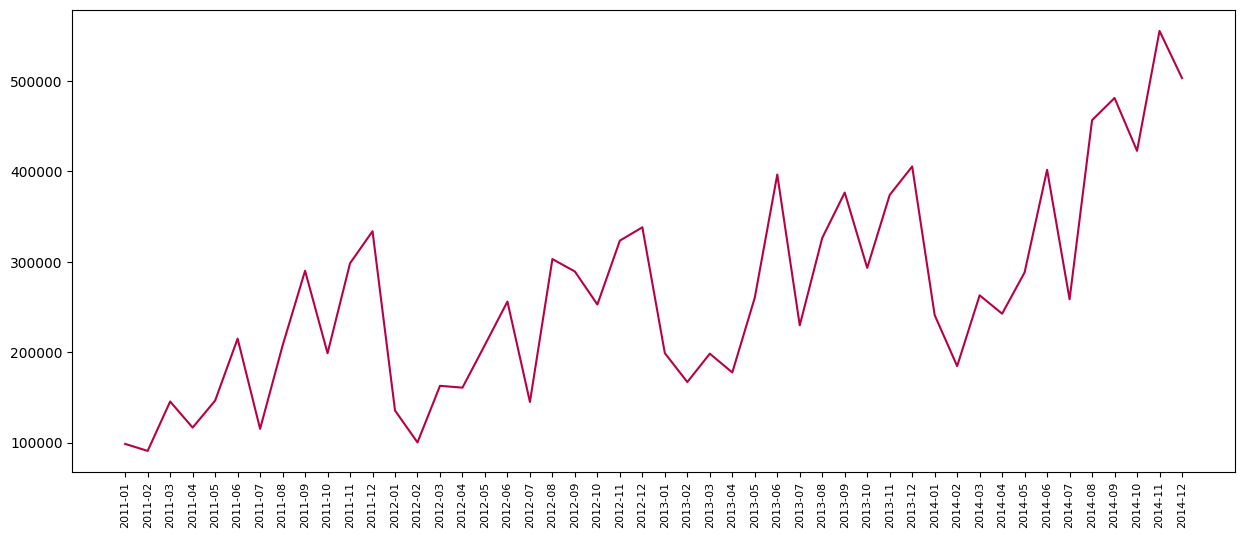

In [30]:
# Setting the figure size

plt.figure(figsize=(15, 6))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80047')
plt.xticks(rotation='vertical', size=8)
plt.show()

#### WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [41]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

C:\Users\User\AppData\Local\Temp\ipykernel_18508\1657410135.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])


In [42]:
# Sorting the dataframe in descending order
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)

In [43]:
# Top 10 products by sales
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


#### WHICH ARE THE MOST SELLING PRODUCTS?

In [45]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

C:\Users\User\AppData\Local\Temp\ipykernel_18508\3670948283.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_selling_prods = pd.DataFrame(df.groupby('product_name').sum()['quantity'])


In [46]:
# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)

In [47]:
# Most selling products
best_selling_prods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


#### WHAT IS THE MOST PREFERRED SHIP MODE?

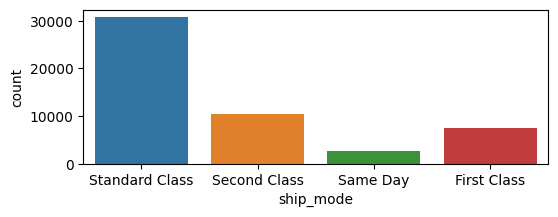

In [66]:
# Setting the figure size
plt.figure(figsize=(6, 2))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=df)

# Display the figure
plt.show()

#### WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?


In [67]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the values
cat_subcat.sort_values(['category','profit'], ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_18508\2496734656.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])


profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870